In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV, cross_val_score

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load lemmatized data

In [4]:
data = pd.read_csv('./data/lemmatized_posts.csv')

In [5]:
data.head(3)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
0,middle aged guys don't buy sports cars because...,1,middle aged guys don't buy sports cars because...,"['middle', 'aged', 'guys', 'buy', 'sports', 'c...","['middle', 'age', 'guy', 'buy', 'sport', 'car'...",middle age guy buy sport car mid life crisis f...
1,"""y'all"" is a brilliant use of the english lang...",1,"""y'all"" is a brilliant use of the english lang...","['brilliant', 'use', 'english', 'language', 'r...","['brilliant', 'use', 'english', 'language', 'r...",brilliant use english language refuse tell oth...
2,i always eat dessert before dinner at a restau...,1,i always eat dessert before dinner at a restau...,"['always', 'eat', 'dessert', 'dinner', 'restau...","['always', 'eat', 'dessert', 'dinner', 'restau...",always eat dessert dinner restaurantwhen resta...


In [6]:
data.shape

(3584, 6)

### Train Bernoulli Naive Bayes ML using lammatized data

In [7]:
X = data['joined_words']
y = data['sent_score']

In [8]:
y.value_counts(normalize = True)

sent_score
1    0.53404
0    0.46596
Name: proportion, dtype: float64

In [9]:
1-y.mean()

0.4659598214285714

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=2024)

In [11]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [12]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [13]:
X_train_cv.shape, X_test_cv.shape

((2150, 13220), (1434, 13220))

In [14]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()

In [15]:
bnb.fit(X_train_cv, y_train)

BernoulliNB()

In [16]:
bnb.score(X_train_cv, y_train)

0.9809302325581395

In [17]:
bnb.score(X_test_cv, y_test)

0.9511854951185496

In [18]:
bnb.predict(X_test_cv)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

#### KFold cross-validation

In [34]:
cross_val_score(bnb, X_train_cv, y_train, cv=5)

array([0.95581395, 0.93953488, 0.95813953, 0.93953488, 0.95813953])

In [35]:
cross_val_score(bnb, X_test_cv, y_test, cv=5)

array([0.94076655, 0.92334495, 0.95470383, 0.91637631, 0.92657343])

In [31]:
np.mean(cross_val_score(bnb, X_train_cv, y_train, cv=5))

0.9502325581395349

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True, random_state=2024)
np.mean(cross_val_score(bnb, X_train_cv, y_train, cv = kf))

0.9493023255813953

#### Apply trained random forest  ML for Sentiment prediction of  college posts.

In [19]:
college = pd.read_csv('./data/coll_lemmatized_posts.csv')

In [20]:
data.sample(3)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
2533,is it weird to bring this to a college dorm?up...,0,is it weird to bring this to a college dorm?up...,"['weird', 'bring', 'college', 'dorm', 'update'...","['weird', 'bring', 'college', 'dorm', 'update'...",weird bring college dorm update thank response...
1856,viral videos that result in severe consequence...,1,viral videos that result in severe consequence...,"['viral', 'videos', 'result', 'severe', 'conse...","['viral', 'video', 'result', 'severe', 'conseq...",viral video result severe consequence due publ...
756,chopsticks are inferior to a fork and knife in...,1,chopsticks are inferior to a fork and knife in...,"['chopsticks', 'inferior', 'fork', 'knife', 'e...","['chopstick', 'inferior', 'fork', 'knife', 'ev...",chopstick inferior fork knife every task canno...


In [21]:
X_coll = college['joined_words']
y_coll = college['sent_score']

In [22]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [23]:
X_coll_cv = cvec.transform(X_coll)

In [24]:
X_train_cv.shape, X_coll_cv.shape

((2150, 13220), (1670, 13220))

In [25]:
coll_predictions =bnb.predict(X_coll_cv)

In [26]:
print(classification_report(coll_predictions, y_coll, digits = 3))

              precision    recall  f1-score   support

           0      0.983     1.000     0.992      1642
           1      0.000     0.000     0.000        28

    accuracy                          0.983      1670
   macro avg      0.492     0.500     0.496      1670
weighted avg      0.967     0.983     0.975      1670



C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


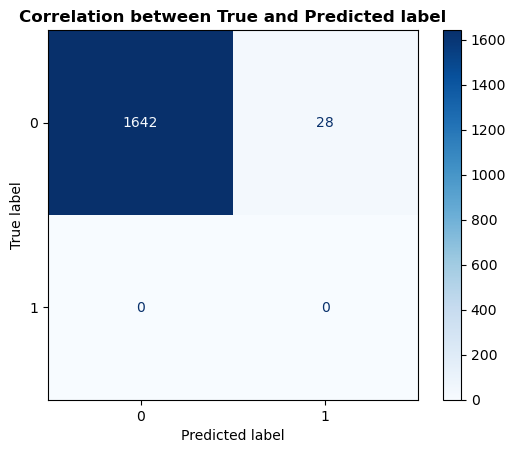

In [27]:
ConfusionMatrixDisplay.from_predictions(y_coll, coll_predictions, cmap = 'Blues')
plt.title('Correlation between True and Predicted label', weight = 'bold');

## *Vulgar language warning!!!!*

#### List of all false predicetd posts 

In [28]:
pred_colls = pd.DataFrame(coll_predictions, columns=['predictions'])

In [29]:

false_pred = college.iloc[pred_colls[pred_colls['predictions'] == 1].index]
false_pred

,post,sent_score,post_tokenized,post_lemmatized,joined_words
45,it’s honestly disgusting what happened to easy...,0,"['honestly', 'disgusting', 'happened', 'easybi...","['honestly', 'disgust', 'happen', 'easybibyoun...",honestly disgust happen easybibyounger zoomers...
47,writing prof here: how to add to essay length ...,0,"['writing', 'prof', 'add', 'essay', 'length', ...","['write', 'prof', 'add', 'essay', 'length', 'w...",write prof add essay length without fluff form...
51,roomate goes to bed so early and gets annoyed ...,0,"['roomate', 'goes', 'bed', 'early', 'gets', 'a...","['roomate', 'go', 'bed', 'early', 'get', 'anno...",roomate go bed early get annoy tok move dorm f...
64,i just flashed in front of peoplei was on a ...,0,"['flashed', 'front', 'peoplei', 'zoom', 'call'...","['flash', 'front', 'peoplei', 'zoom', 'call', ...",flash front peoplei zoom call know camera chan...
100,"i don't know who needs to hear this, but... . ...",0,"['know', 'needs', 'hear', 'go', 'drink', 'glas...","['know', 'need', 'hear', 'go', 'drink', 'glass...",know need hear go drink glass water eat health...
129,quarantine group chatbecause you’re bored and ...,0,"['quarantine', 'group', 'chatbecause', 'bored'...","['quarantine', 'group', 'chatbecause', 'bore',...",quarantine group chatbecause bore new
133,"ladies, if your backpack is fully pulling up t...",0,"['ladies', 'backpack', 'fully', 'pulling', 'ba...","['lady', 'backpack', 'fully', 'pull', 'back', ...",lady backpack fully pull back skirt tell every...
173,get your flu shotsseriously guys. just go to c...,0,"['get', 'flu', 'shotsseriously', 'guys', 'go',...","['get', 'flu', 'shotsseriously', 'guy', 'go', ...",get flu shotsseriously guy go cvs get free flu...
199,how some of yall have active sex lives is beyo...,0,"['yall', 'active', 'sex', 'lives', 'beyond', '...","['yall', 'active', 'sex', 'live', 'beyond', 'm...",yall active sex live beyond mei know go weird ...
207,"yo peeps, weekends are supposed to be for rela...",0,"['yo', 'peeps', 'weekends', 'supposed', 'relax...","['yo', 'peep', 'weekend', 'suppose', 'relaxati...",yo peep weekend suppose relaxation fuck much shit
